<h1 style="text-align:center; font-family:Arial; color: #3f51b5;">
  Spotify Songs Model – EDA & Analysis
</h1>

<p style="text-align:center; font-family:Arial; color:#555;">
  A clear and structured overview of the dataset and model insights.
</p>

<hr style="border:1px solid  #3f51b5;;">


In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [212]:
df = pd.read_csv(r"C:\Users\Vijay_k943wj6\Desktop\DataTry1\Data Science try\Project\SpotifySongs.csv",encoding = 'latin1')

In [213]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [214]:
df = df.drop(df[['Unnamed: 0', 'Track.Name']], axis = 1)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist.Name       50 non-null     object
 1   Genre             50 non-null     object
 2   Beats.Per.Minute  50 non-null     int64 
 3   Energy            50 non-null     int64 
 4   Danceability      50 non-null     int64 
 5   Loudness..dB..    50 non-null     int64 
 6   Liveness          50 non-null     int64 
 7   Valence.          50 non-null     int64 
 8   Length.           50 non-null     int64 
 9   Acousticness..    50 non-null     int64 
 10  Speechiness.      50 non-null     int64 
 11  Popularity        50 non-null     int64 
dtypes: int64(10), object(2)
memory usage: 4.8+ KB


<h4>1. Basic Columns

Artist.Name
Just the name of the artist. Pure text.

Genre
Category of the music. Also text.

These two will need encoding if you use them for ML.

2. Audio Features (All numeric)

These describe the character of each track. Here’s what they generally represent in Spotify’s world:

Beats.Per.Minute (BPM)
Tempo of the track. Higher = faster.

Energy
Measures intensity and activity. Loud, fast, aggressive songs score high.

Danceability
How easy it is to dance to. Rhythm + beat + groove.

Loudness (dB)
Overall volume level of the track. Usually negative numbers before scaling.

Liveness
Higher means the track sounds live (crowd sounds etc.).

Valence
Positivity of the track. High valence = happy/vibrant songs; low = sad/dark.

Length
Duration of the track (probably milliseconds or seconds).

Acousticness
Measures how acoustic or “non-electronic” the song is.

Speechiness
How much spoken content is present. Rap tends to have higher values.

Popularity
Spotify popularity score (0–100). Just a metric based on listener behavior.

<h5>What type of data is this?</h5>

A clean dataset for clustering and recommendation tasks.
It’s small (50 songs), but the features are standard Spotify-style audio metrics.

This dataset is PERFECT for:

KMeans clustering

PCA dimensionality reduction

Genre profiling

Artist similarity

Recommendation based on audio patterns

This dataset is NOT good for:

DBSCAN
because the audio feature space is smooth, continuous, and doesn’t form natural density clusters.</h4>


<h3>In one sentence
Spotify-style dataset of 50 songs with rich audio features that describe tempo, energy, danceability, mood, loudness, acousticness, and popularity, making it very suitable for KMeans recommendation tasks.</h3>

In [216]:
df.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [217]:
df.describe(include = 'object')

,Artist.Name,Genre
count,50,50
unique,38,21
top,Ed Sheeran,dance pop
freq,4,8


In [218]:
most_pop_art = df.groupby('Artist.Name')['Popularity'].mean().sort_values(ascending = False).reset_index()
#most_pop_art

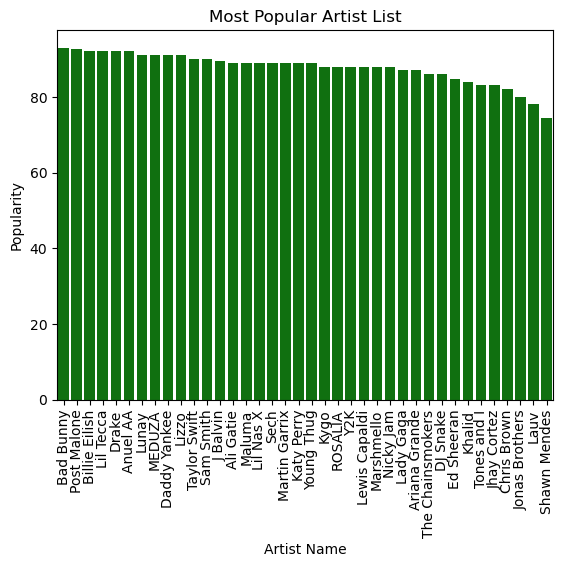

In [219]:
sns.barplot(data = most_pop_art, x = 'Artist.Name', y = 'Popularity', color = 'Green')
plt.xticks(rotation = 90)
plt.xlabel('Artist Name')
plt.title('Most Popular Artist List');

<h4>
A barplot showing each artist’s popularity based on the *most_pop_art* dataset.
The x-axis lists artist names, rotated for readability, highlighting who ranks highest.
</h4>

In [220]:
most_song_art = df.groupby('Artist.Name')['Popularity'].max().reset_index()
#most_song_art

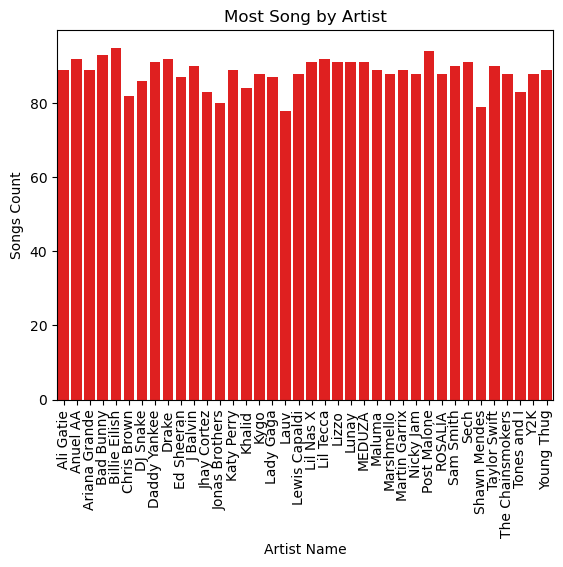

In [221]:
sns.barplot(data = most_song_art, x = 'Artist.Name', y = 'Popularity', color = 'Red')
plt.xticks(rotation = 90)
plt.xlabel('Artist Name')
plt.ylabel('Songs Count')
plt.title('Most Song by Artist');

<h4>A barplot displaying how many songs each artist has contributed in the most_song_art dataset.
Artist names are shown along the x-axis, rotated ftlyor clarity, highlighting which artists appear most frequently</h4>

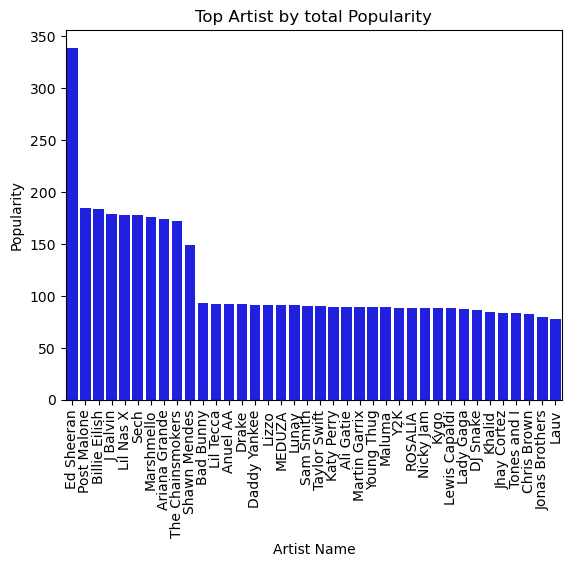

In [222]:
top_total_pop = df.groupby('Artist.Name')['Popularity'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data = top_total_pop, x = 'Artist.Name', y = 'Popularity', color = 'Blue')
plt.xticks(rotation = 90)
plt.xlabel('Artist Name')
plt.title('Top Artist by total Popularity');

<h4>A barplot showing artists ranked by the total popularity of all their songs combined in the dataset.
The x-axis lists artists, rotated for readability, making it easy to see who dominates overall popularity.
</h4>

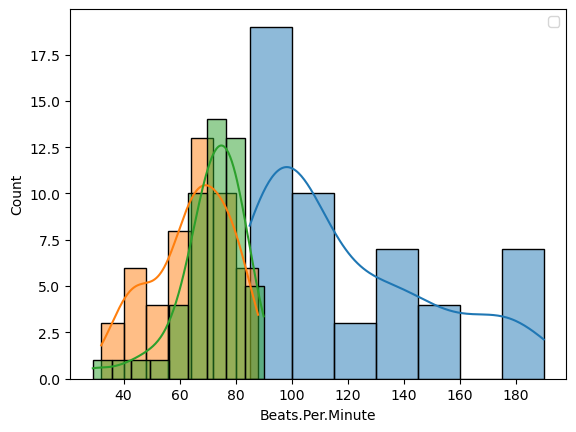

In [223]:
sns.histplot(df['Beats.Per.Minute'], kde=True)
sns.histplot(df['Energy'], kde=True)
sns.histplot(df['Danceability'], kde=True)
plt.legend();

<h4>A  set of histograms showing how BPM, Energy, and Danceability are distributed across the songs, each with KDE curves for smoother patterns.
This helps reveal whether the tracks lean toward fast, energetic, or highly danceable styles overall.</h4>

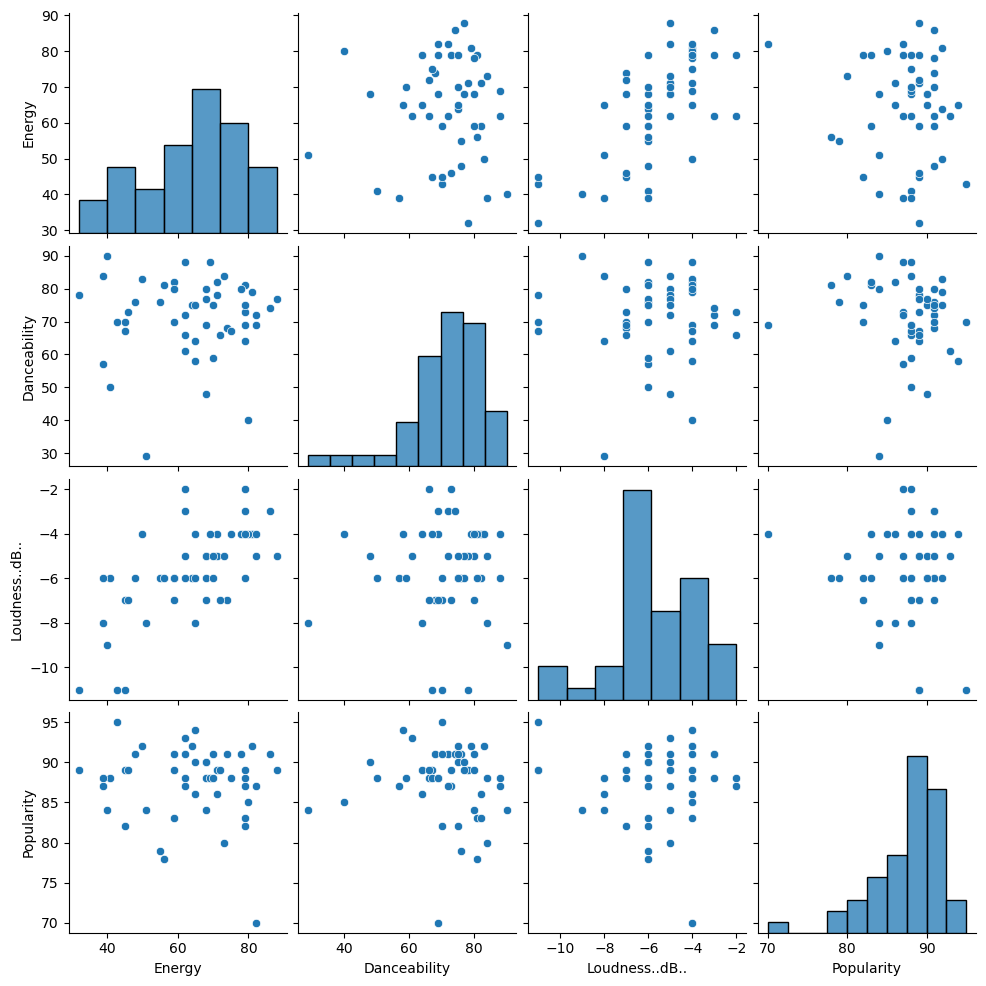

In [225]:
sns.pairplot(df[['Energy', 'Danceability', 'Loudness..dB..', 'Popularity']]);

<h4>A pairplot comparing Energy, Danceability, Loudness, and Popularity to reveal how these audio features relate to one another.
It helps you spot patterns, correlations, and clusters across the selected song characteristics.
</h4>

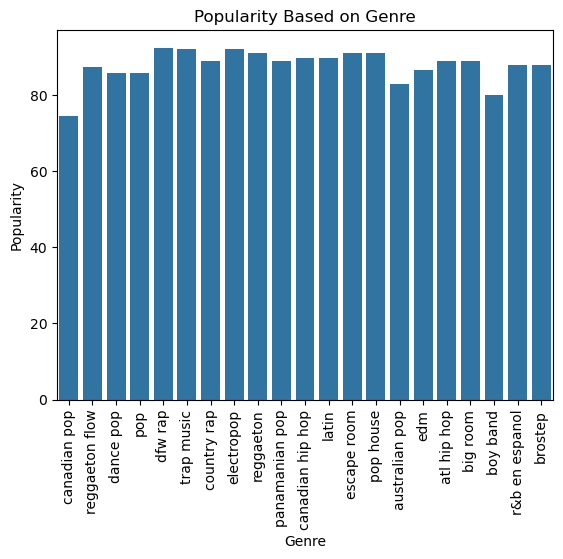

In [226]:
sns.barplot(x='Genre', y='Popularity', data=df, ci = False)
plt.xticks(rotation = 90)
plt.title('Popularity Based on Genre');

<h4>A barplot showing how popularity varies across different music genres in your dataset.
The rotated x-axis makes it easy to compare which genres attract higher listener interest.
</h4>

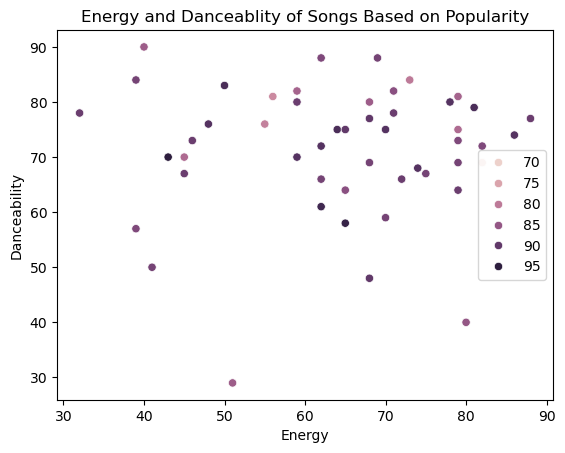

In [227]:
sns.scatterplot(x='Energy', y='Danceability', hue='Popularity', data=df)
plt.legend(loc = 7)
plt.title('Energy and Danceablity of Songs Based on Popularity');

<h4>A scatterplot mapping Energy against Danceability, with color indicating each track’s popularity.
It helps you see how energetic or dance-friendly songs cluster, and whether higher-popularity tracks follow any clear pattern.
</h4>

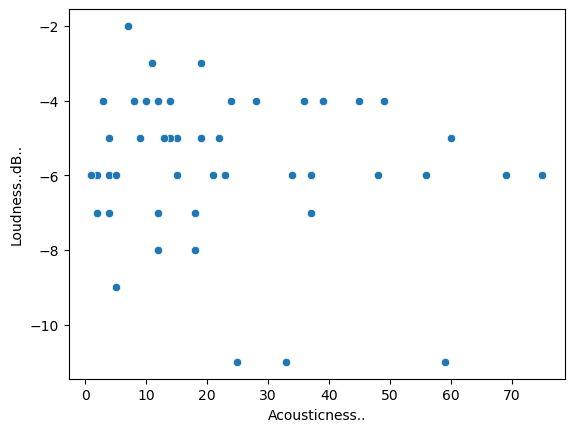

In [228]:
sns.scatterplot(x='Acousticness..', y='Loudness..dB..', data=df);

<h4>A scatterplot showing how acoustic a track is compared to its loudness level.
It gives a quick sense of whether more acoustic songs tend to be softer or if anything breaks the pattern.
</h4>

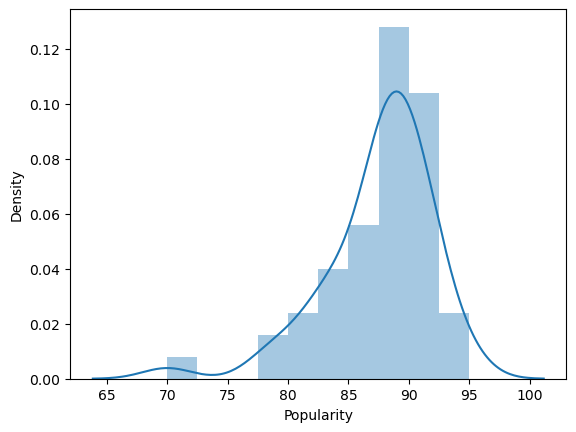

In [229]:
sns.distplot(df['Popularity'], kde = True);

<h4>A distribution plot showing how song popularity is spread across the dataset, with a KDE curve highlighting the overall shape.
It helps whether popularity is mostly low, high, or clustered somewhere in the middle.
</h4>

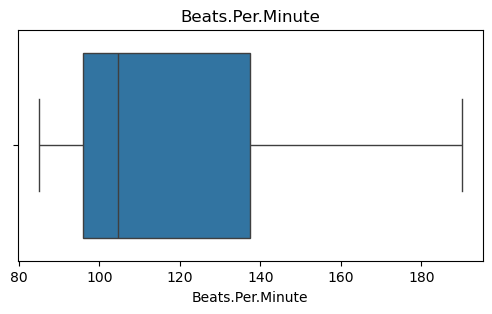

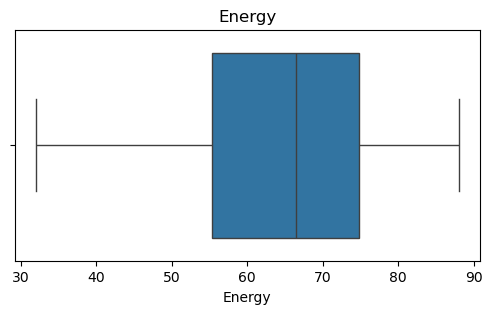

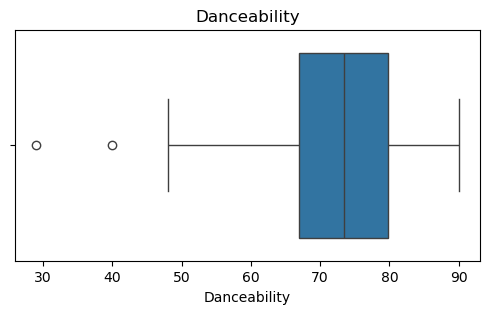

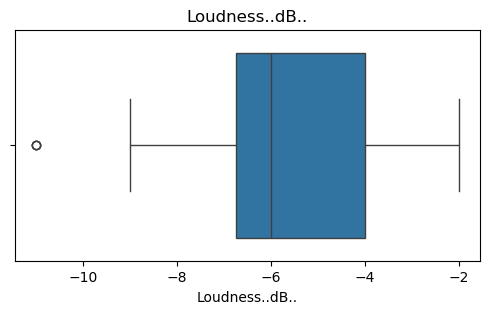

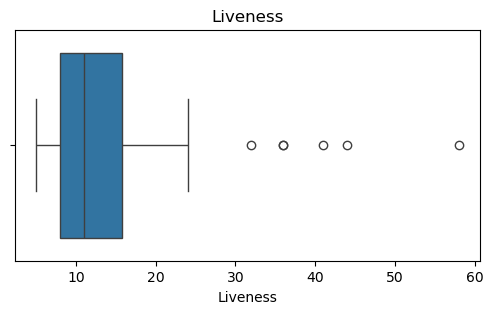

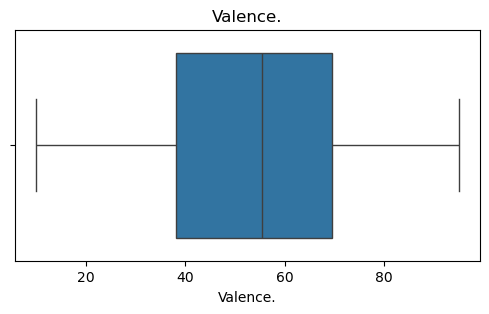

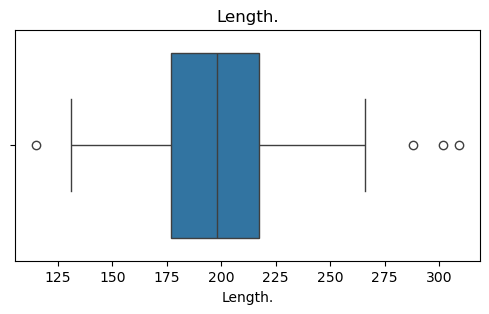

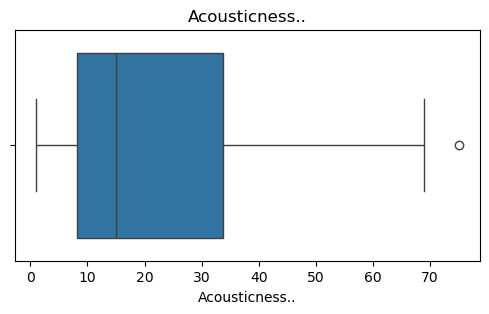

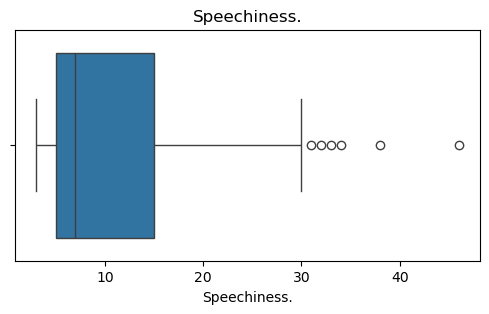

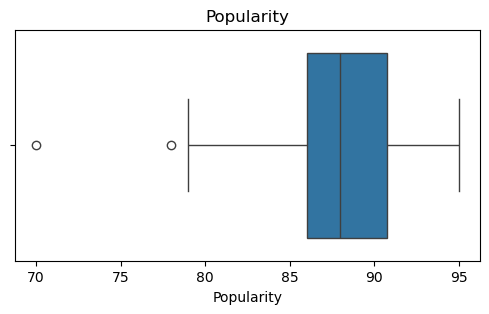

In [234]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=num_cols[col])
    plt.title(col)
    plt.show()

<h4>Identifying Outliers and Removing</h4>

In [235]:
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

mask = ~((df[num_cols.columns] < (Q1 - 1.5 * IQR)) | 
         (df[num_cols.columns] > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = df[mask]


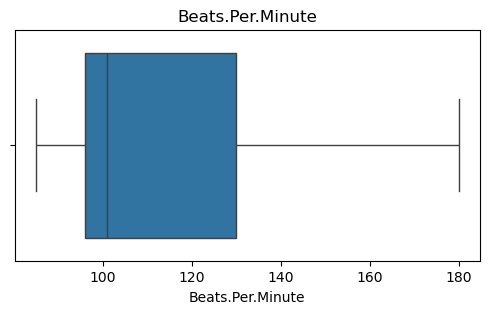

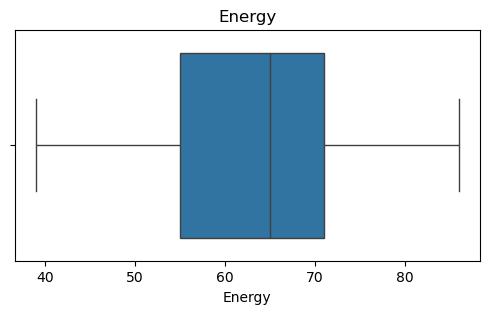

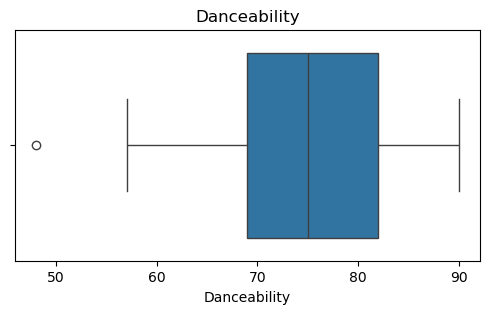

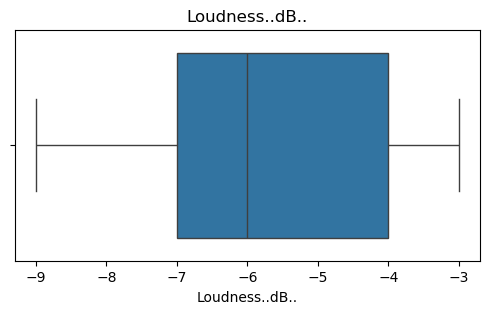

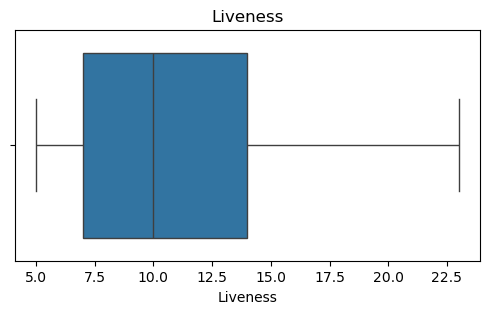

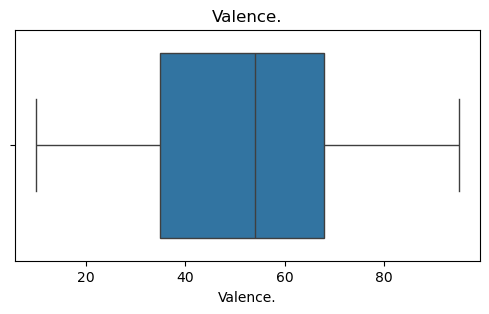

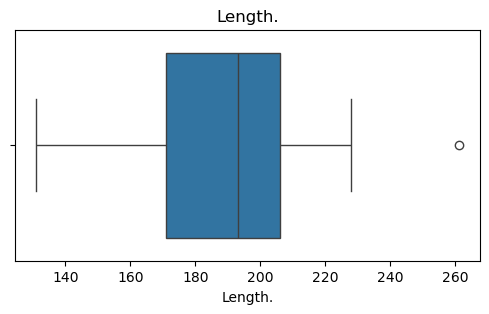

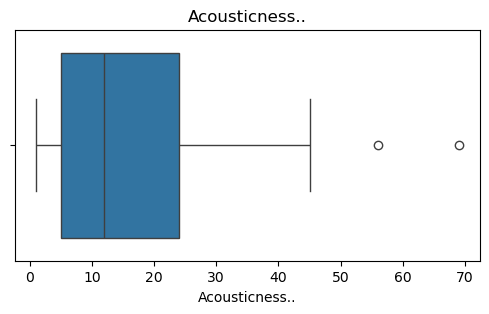

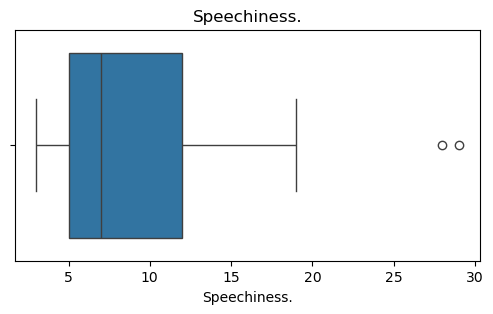

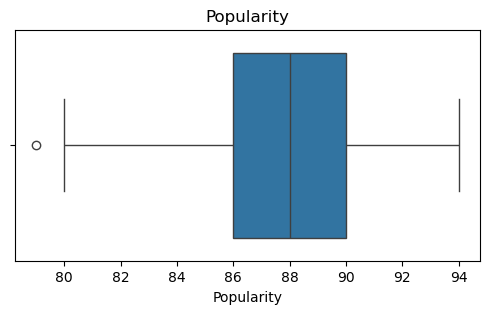

In [236]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64'])

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_clean[col])
    plt.title(col)
    plt.show()


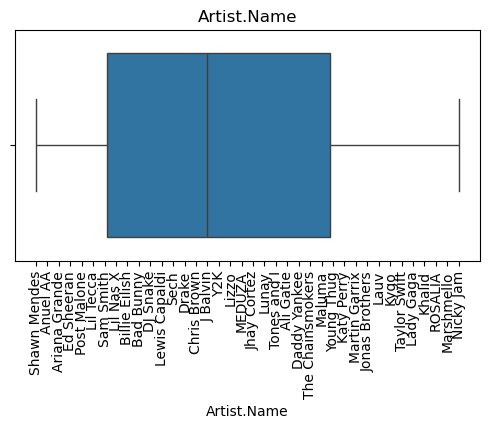

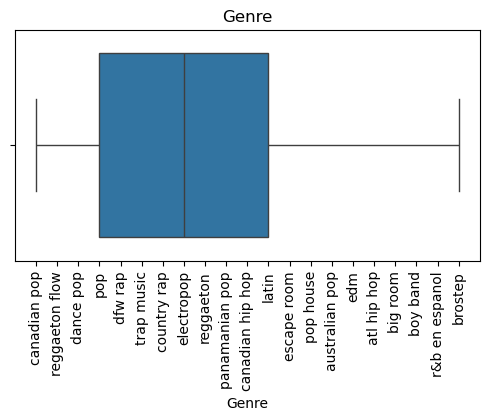

In [237]:
cat_cols = df.select_dtypes('object')
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=cat_cols[col])
    plt.title(col)
    plt.xticks(rotation = 90)
    plt.show()

<h4>Label Encoding</h4>

In [243]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [244]:
df['Artist.Name'] = lr.fit_transform(df['Artist.Name'])
df['Genre'] = lr.fit_transform(df['Genre'])

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Artist.Name       50 non-null     int64
 1   Genre             50 non-null     int64
 2   Beats.Per.Minute  50 non-null     int64
 3   Energy            50 non-null     int64
 4   Danceability      50 non-null     int64
 5   Loudness..dB..    50 non-null     int64
 6   Liveness          50 non-null     int64
 7   Valence.          50 non-null     int64
 8   Length.           50 non-null     int64
 9   Acousticness..    50 non-null     int64
 10  Speechiness.      50 non-null     int64
 11  Popularity        50 non-null     int64
dtypes: int64(12)
memory usage: 4.8 KB


In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [247]:
data_scaled = scaler.fit_transform(df)

<h4>KMeans</h4>

In [249]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 45, n_init = 10) 

In [250]:
df['k_cluster'] = kmeans.fit_predict(data_scaled)

In [251]:
df.head()

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,k_cluster
0,32,6,117,55,76,-6,8,75,191,4,3,79,1
1,1,19,105,81,79,-4,8,61,302,8,9,92,1
2,2,8,190,80,40,-4,16,70,186,12,46,85,1
3,9,15,93,65,64,-8,8,55,198,12,19,86,1
4,28,9,150,65,58,-4,11,18,175,45,7,94,0


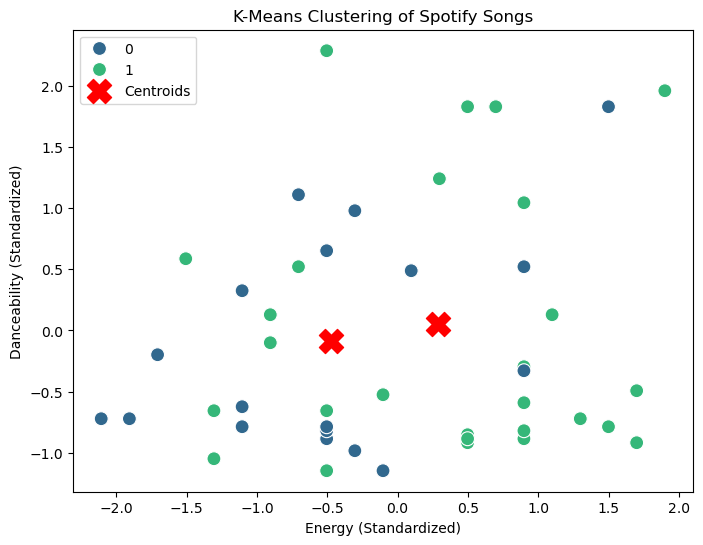

In [256]:
X = data_scaled
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, num_cols.columns.get_loc('Energy')],y=X[:, num_cols.columns.get_loc('Danceability')],hue=df['k_cluster'],palette='viridis',s=100)
plt.scatter(kmeans.cluster_centers_[:, num_cols.columns.get_loc('Energy')],kmeans.cluster_centers_[:, num_cols.columns.get_loc('Danceability')],s=300,c='red',marker='X',label='Centroids')
plt.xlabel("Energy (Standardized)")
plt.ylabel("Danceability (Standardized)")
plt.title("K-Means Clustering of Spotify Songs")
plt.legend()
plt.show()


<h4>A cluster scatterplot mapping standardized Energy vs. Danceability, with each song colored by its assigned K-Means cluster.
The red X markers highlight the cluster centroids, making the group separation and song patterns easy to interpret.
</h4>

In [266]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(data_scaled, labels= df['k_cluster'])
sil

np.float64(0.12045556565557707)

In [267]:
df_new = scaler.fit_transform(data_scaled)

In [268]:
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 45, n_init = 10)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

<h4>Here doing a Elbow Method</h4>

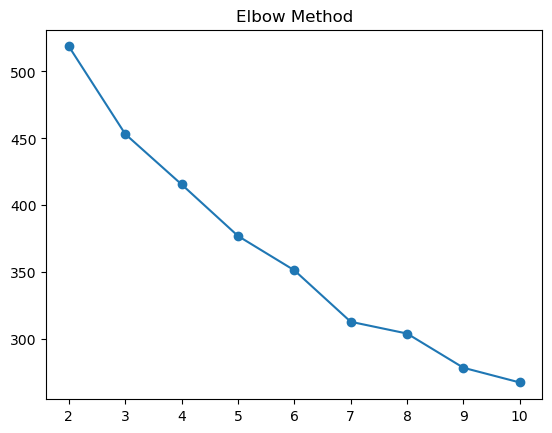

In [269]:
plt.plot(range(2,11), wcss ,marker = 'o')
plt.title('Elbow Method');

In [271]:
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 45, n_init = 10)
    cluster_labels = kmeans.fit_predict(df_new)
    silhouette_avg = silhouette_score(df_new, cluster_labels)
    silhouette_scores.append(silhouette_avg)

<h4>Here doing a Silhouette Score</h4>

Text(0.5, 1.0, 'Silhouette Score')

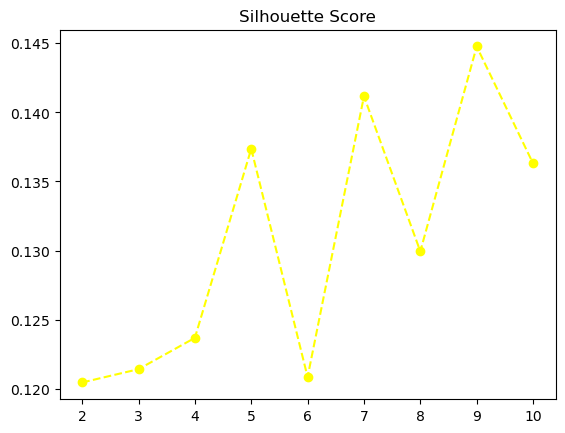

In [274]:
plt.plot(range(2,11), silhouette_scores, marker = 'o', linestyle = '--', color = 'Yellow')
plt.title('Silhouette Score')

<h4>Taking k Value as 5</h4>

In [276]:
optimal_k_values = 5
kmeans = KMeans(n_clusters = optimal_k_values, random_state = 45, n_init = 10)

In [278]:
df['k_cluster'] = kmeans.fit_predict(df_new)
df.head()

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,k_cluster
0,32,6,117,55,76,-6,8,75,191,4,3,79,1
1,1,19,105,81,79,-4,8,61,302,8,9,92,4
2,2,8,190,80,40,-4,16,70,186,12,46,85,4
3,9,15,93,65,64,-8,8,55,198,12,19,86,1
4,28,9,150,65,58,-4,11,18,175,45,7,94,3


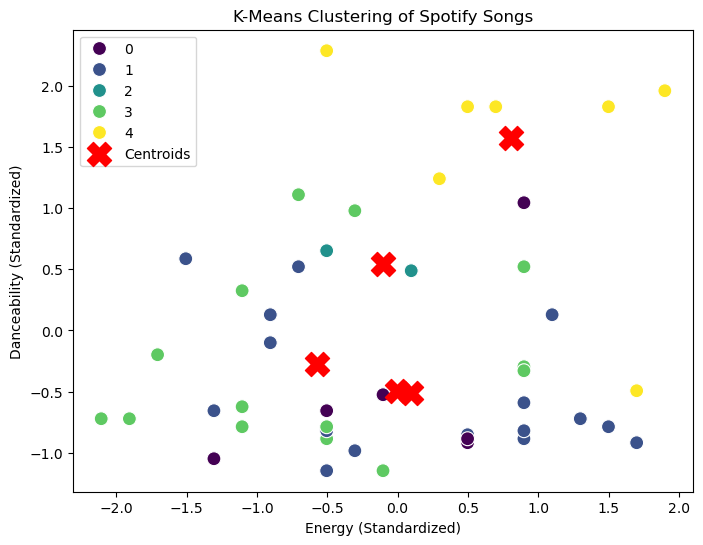

In [279]:
X = data_scaled
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, num_cols.columns.get_loc('Energy')],y=X[:, num_cols.columns.get_loc('Danceability')],hue=df['k_cluster'],palette='viridis',s=100)
plt.scatter(kmeans.cluster_centers_[:, num_cols.columns.get_loc('Energy')],kmeans.cluster_centers_[:, num_cols.columns.get_loc('Danceability')],s=300,c='red',marker='X',label='Centroids')
plt.xlabel("Energy (Standardized)")
plt.ylabel("Danceability (Standardized)")
plt.title("K-Means Clustering of Spotify Songs")
plt.legend()
plt.show()


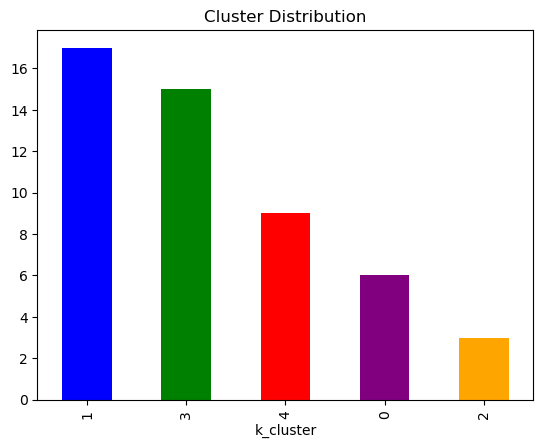

In [286]:
df['k_cluster'].value_counts().plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Cluster Distribution')
plt.show()

<h4>Hierarchial Clustering</h4>

In [280]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [281]:
link = linkage(df_new, method = 'ward')

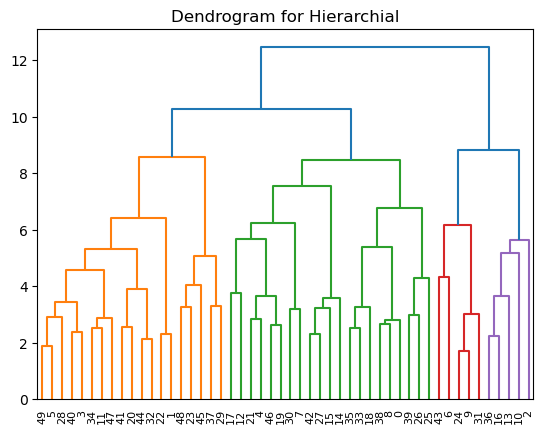

In [287]:
dendrogram(link, orientation = 'top', distance_sort = 'descending', show_leaf_counts = False)
plt.title('Dendrogram for Hierarchial')
plt.show()

In [295]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5)
df['h_cluster'] = hc.fit_predict(df_new)

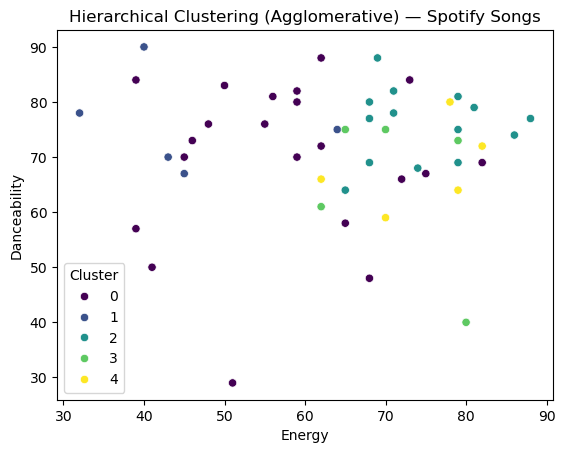

In [296]:
sns.scatterplot(x = df['Energy'],y = df['Danceability'], hue = df['h_cluster'], palette = 'viridis')
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.title("Hierarchical Clustering (Agglomerative) — Spotify Songs")
plt.legend(title="Cluster")
plt.show()

<h3>DBSCAN</h3>

In [302]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=3)

In [303]:
df['db_cluster'] = dbscan.fit_predict(df_new)

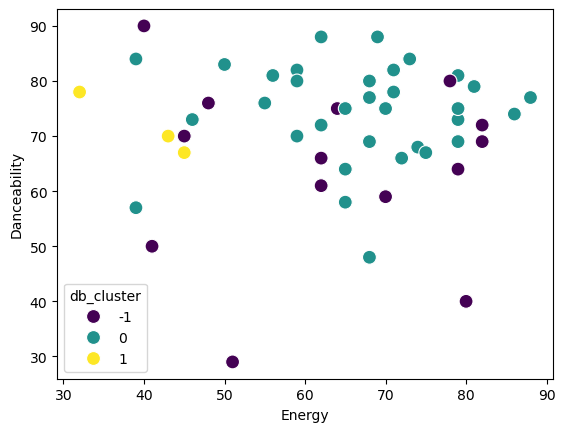

In [304]:
sns.scatterplot(data = df ,x ='Energy', y = 'Danceability' , hue= 'db_cluster' , palette='viridis', s=100)
#plt.title("Customer Segmentation using DBSCAN")
plt.show()

In [311]:
print("DBSCAN Cluster Labels:")
print(df['db_cluster'].value_counts())

DBSCAN Cluster Labels:
db_cluster
 0    33
-1    14
 1     3
Name: count, dtype: int64


In [315]:
for eps in np.arange(0.5, 10.0, 0.5):
    for ms in [3, 5, 7, 10]:
        db = DBSCAN(eps=eps, min_samples=ms).fit(df_new)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise = list(labels).count(-1)

        print(f"eps={eps:.2f}, ms={ms}, clusters={n_clusters}, noise={noise}")


eps=0.50, ms=3, clusters=0, noise=50
eps=0.50, ms=5, clusters=0, noise=50
eps=0.50, ms=7, clusters=0, noise=50
eps=0.50, ms=10, clusters=0, noise=50
eps=1.00, ms=3, clusters=0, noise=50
eps=1.00, ms=5, clusters=0, noise=50
eps=1.00, ms=7, clusters=0, noise=50
eps=1.00, ms=10, clusters=0, noise=50
eps=1.50, ms=3, clusters=0, noise=50
eps=1.50, ms=5, clusters=0, noise=50
eps=1.50, ms=7, clusters=0, noise=50
eps=1.50, ms=10, clusters=0, noise=50
eps=2.00, ms=3, clusters=0, noise=50
eps=2.00, ms=5, clusters=0, noise=50
eps=2.00, ms=7, clusters=0, noise=50
eps=2.00, ms=10, clusters=0, noise=50
eps=2.50, ms=3, clusters=1, noise=46
eps=2.50, ms=5, clusters=0, noise=50
eps=2.50, ms=7, clusters=0, noise=50
eps=2.50, ms=10, clusters=0, noise=50
eps=3.00, ms=3, clusters=2, noise=14
eps=3.00, ms=5, clusters=1, noise=24
eps=3.00, ms=7, clusters=1, noise=28
eps=3.00, ms=10, clusters=1, noise=40
eps=3.50, ms=3, clusters=1, noise=2
eps=3.50, ms=5, clusters=1, noise=7
eps=3.50, ms=7, clusters=1, noise=

<h4>data does not have density-based clusters.
DBSCAN is not the right tool here..</h4>

<h3>

A structured exploration of the Spotify dataset through extensive visualizations and multiple clustering techniques. Initial plots examine artist popularity, song frequency, and genre-level differences, followed by distribution and relationship analyses of core audio features such as Energy, Danceability, Loudness, Acousticness, and Popularity. These visuals establish a clear understanding of musical patterns and feature interactions within the dataset.
</h3>

<h3> K-Means clustering is then applied to the standardized feature space, effectively segmenting songs into meaningful groups and revealing distinct audio-based profiles.</h3>
<h3>Hierarchical clustering provides an additional perspective by illustrating how tracks naturally group at different linkage levels.</h3>
<h3> While DBSCAN is evaluated as well, its results indicate that the dataset lacks density-based cluster structure, reinforcing the suitability of K-Means and hierarchical methods for this type of musical feature data.</h3>

<h3> Overall, the workflow delivers a complete, data-driven segmentation and visualization framework that highlights artist trends, genre behavior, feature distributions, and the underlying structure of the songs.
</h3>